# Heart Disease Classification

## Import Libraries

In [1]:
# Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re



from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

## 1. Data Preparation and Data Exploration

In [2]:
# Read data in the excel file
df = pd.read_csv('data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


In [4]:
#Check null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    150
2    120
Name: target, dtype: int64

In [6]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    55.555556
2    44.444444
Name: target, dtype: float64

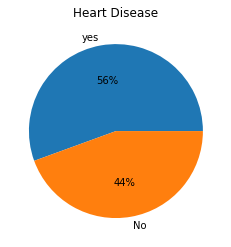

In [7]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


56% of the persons in the dataset have heart disease.

### Attributes Correlation

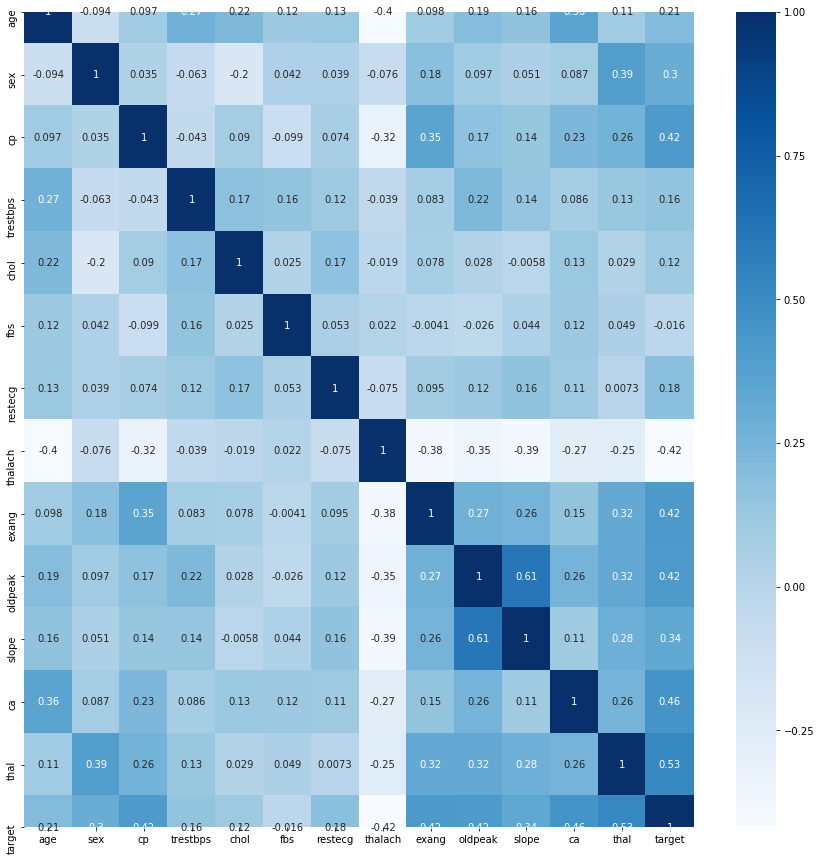

In [8]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.show()


* The number of major vessels (0-3) colored by flourosopy (ca) and the age.
* ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
* The chest pain type (cp), exercise induced angina (exang).
* maximum heart rate (thalch) and the age.



explore each attribute and then explore the found correlations.

### Age Exploration


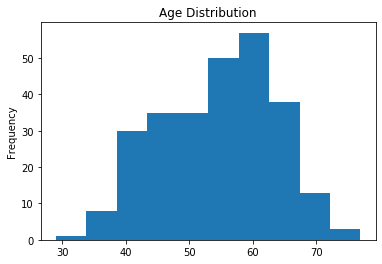

In [9]:
# Display age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [10]:
# Get min, max and average of the age
print('Min age: ', min(df['age']))
print('Max age: ', max(df['age']))
print('Average age: ', df['age'].mean())

Min age:  29
Max age:  77
Average age:  54.43333333333333


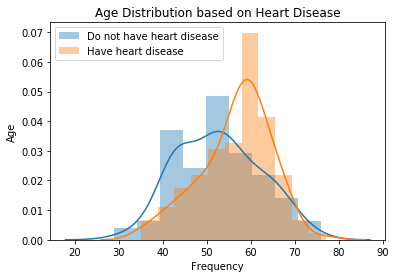

In [11]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 1]['age'], label='Do not have heart disease')
sns.distplot(df[df['target'] == 2]['age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [12]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(df[df['target'] == 1]['age']))
print('Max age of people who do not have heart disease: ', max(df[df['target'] == 1]['age']))
print('Average age of people who do not have heart disease: ', df[df['target'] == 1]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [13]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(df[df['target'] == 2]['age']))
print('Max age of people who have heart disease: ', max(df[df['target'] == 2]['age']))
print('Average age of people who have heart disease: ', df[df['target'] == 2]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


**Note:**

From the data, I can say that the heart disease infects the old and young people, and the probability of the old people te be infected is higher than young people.  



### Gender Exploration

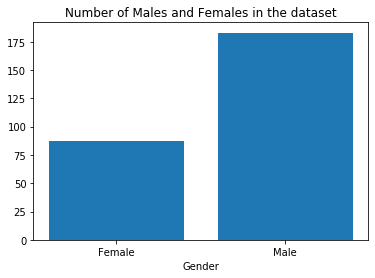

In [14]:
# Number of males and females
F = df[df['sex'] == 0].count()['target']
M = df[df['sex'] == 1].count()['target']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Chest Pain Type Exploration

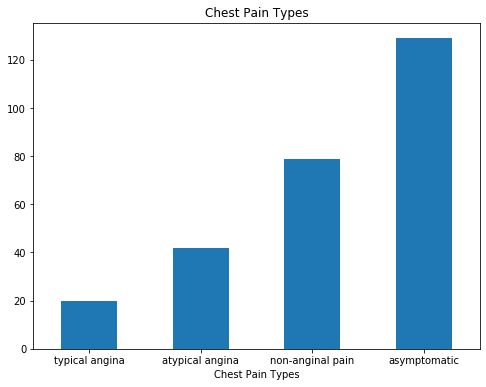

In [15]:
# Display chest pain types in bar chart
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.show()

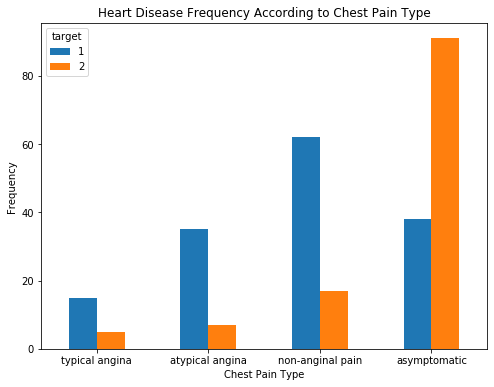

In [16]:
# Display chest pain types based on the target
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

We can see that most of the people with heart disease have asymptomatic chest pain.



### Blood Pressure Exploration 

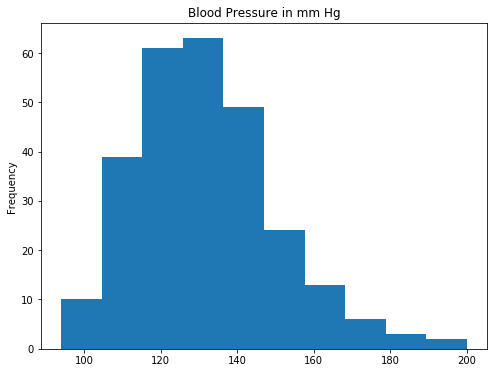

In [17]:
# Display blood pressure distribution
df['trestbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

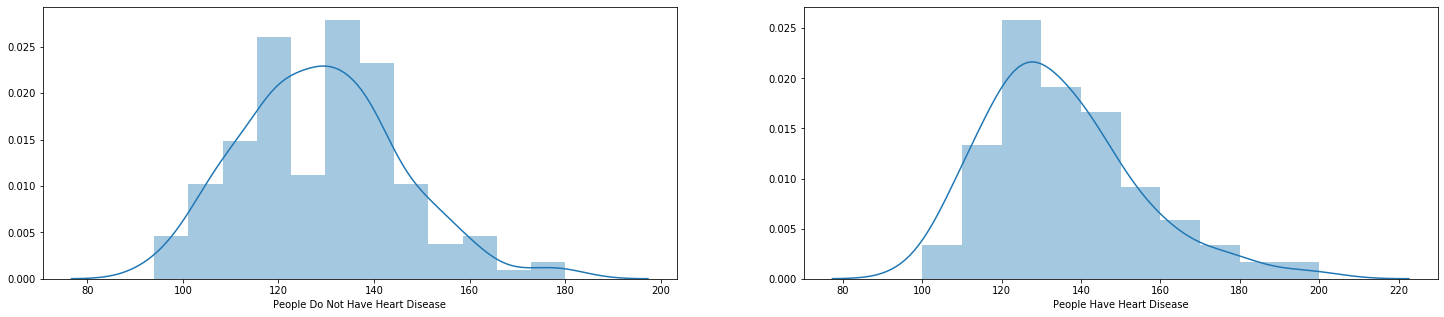

In [18]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [19]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  128.86666666666667


In [20]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(df[df['target'] == 2]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(df[df['target'] == 2]['trestbps']))
print('Average blood pressure of people who have heart disease: ', df[df['target'] == 2]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.44166666666666


### Cholestoral Exploration 

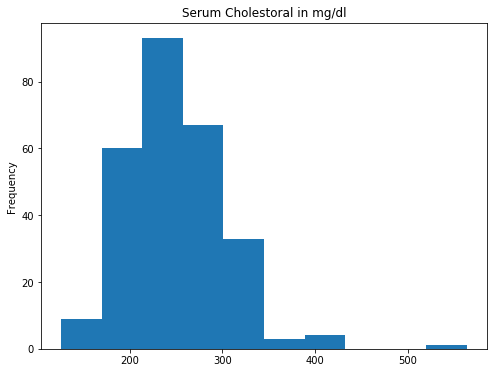

In [21]:
# Display Cholestoral distribution
df['chol'].plot(kind = 'hist', title = 'Serum Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

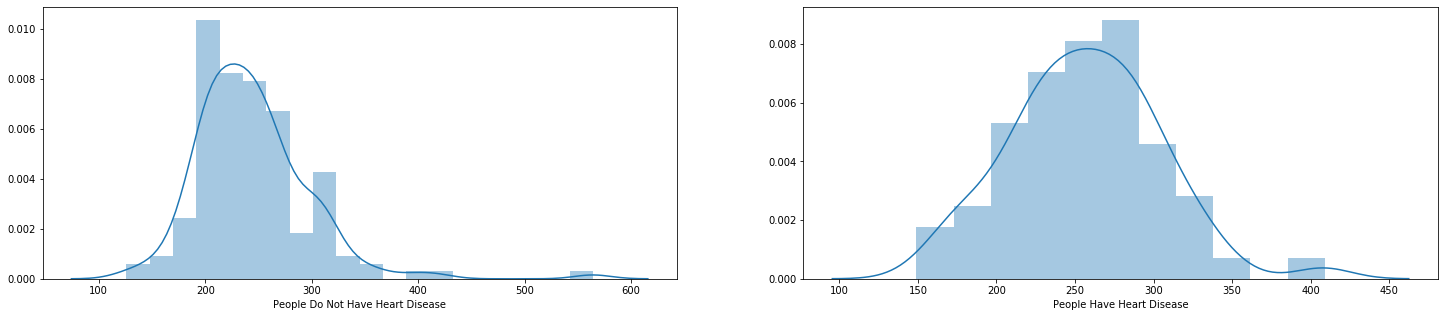

In [22]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [23]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(df[df['target'] == 1]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(df[df['target'] == 1]['chol']))
print('Average cholestoral of people who do not have heart disease: ', df[df['target'] == 1]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  244.21333333333334


In [24]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(df[df['target'] == 2]['chol']))
print('Max cholestoral of people who have heart disease: ', max(df[df['target'] == 2]['chol']))
print('Average cholestorale of people who have heart disease: ', df[df['target'] == 2]['chol'].mean())

Min cholestoral of people who have heart disease:  149
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  256.46666666666664


### Fasting Blood Sugar  Exploration 

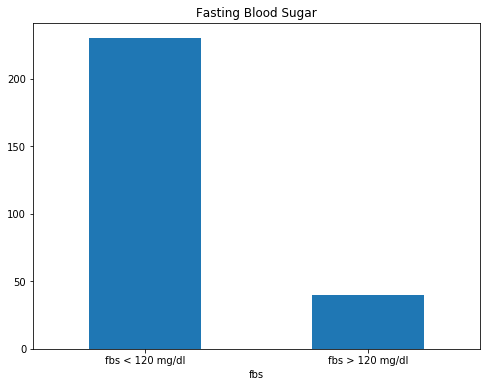

In [25]:
# Display fasting blood sugar in bar chart
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

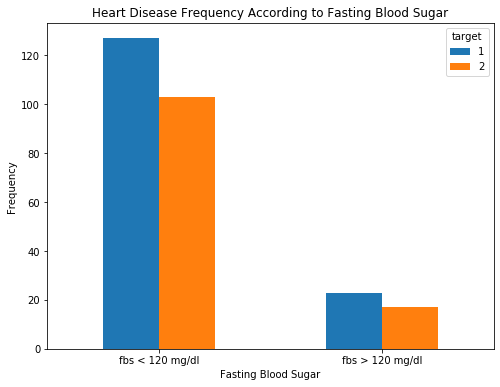

In [26]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

###  Electrocardiographic Results Exploration

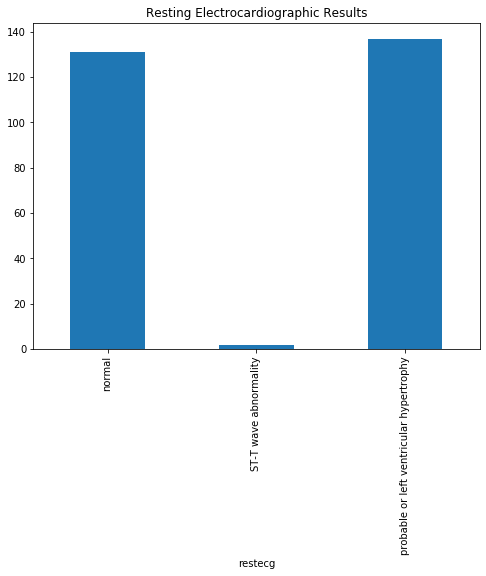

In [27]:
# Display electrocardiographic results in bar chart
df.groupby(df['restecg']).count()['target'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.show()

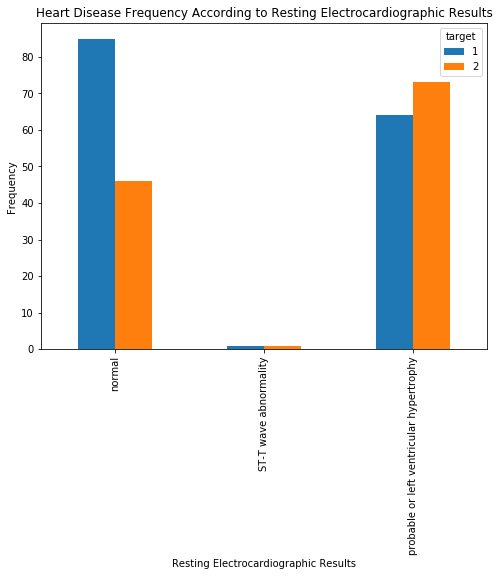

In [28]:
# Display resting electrocardiographic results based on the target
pd.crosstab(df.restecg,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

**Note:**

Usually the people who do not have heart disease have normal electrocardiographic, whereas the people who have heart disease have probable or left ventricular hypertrophy.

### Maximum Heart Rate Exploration

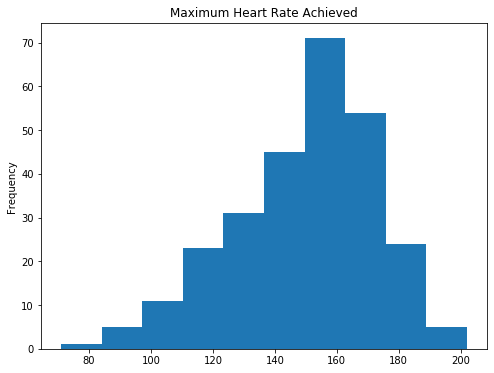

In [29]:
# Display maximum heart rate distribution
df['thalach'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

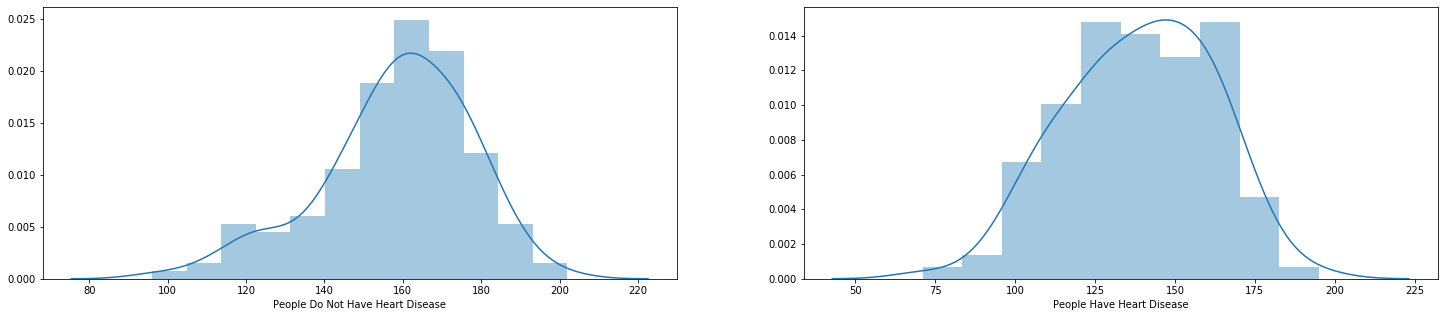

In [30]:
# Display maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [31]:
# Get min, max and average of the maximum heart rate of the people do not have heart diseas
print('Min resting blood pressure of people who do not have heart disease: ', min(df[df['target'] == 1]['thalach']))
print('Max resting blood pressure of people who do not have heart disease: ', max(df[df['target'] == 1]['thalach']))
print('Average resting blood pressure of people who do not have heart disease: ', df[df['target'] == 1]['thalach'].mean())

Min resting blood pressure of people who do not have heart disease:  96
Max resting blood pressure of people who do not have heart disease:  202
Average resting blood pressure of people who do not have heart disease:  158.33333333333334


In [32]:
# Get min, max and average of the maximum heart rate of the people have heart diseas
print('Min maximum heart rate  of people who have heart disease: ', min(df[df['target'] == 2]['thalach']))
print('Max maximum heart rate people who have heart disease: ', max(df[df['target'] == 2]['thalach']))
print('Average maximum heart rate of people who have heart disease: ', df[df['target'] == 2]['thalach'].mean())

Min maximum heart rate  of people who have heart disease:  71
Max maximum heart rate people who have heart disease:  195
Average maximum heart rate of people who have heart disease:  138.85833333333332


**Note:**

The people who have heigh heart rate greater than 150 are more likely to have heart disease.

### Exercise Induced Angina Exploration

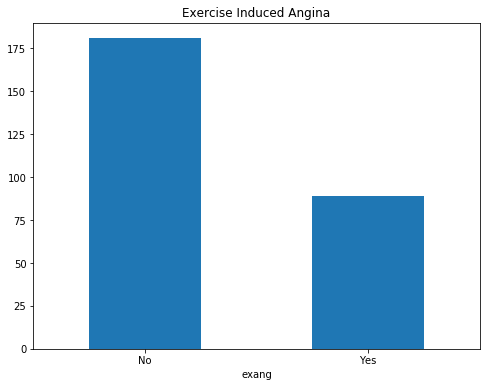

In [33]:
# Display exercise induced angina in bar chart
df.groupby(df['exang']).count()['target'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.show()

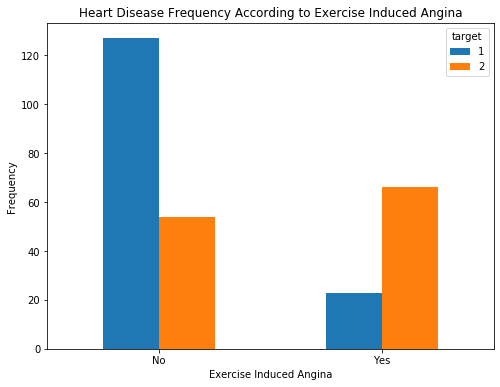

In [34]:
# Display exercise induced angina based on the target
pd.crosstab(df.exang,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

### ST depression Exploration

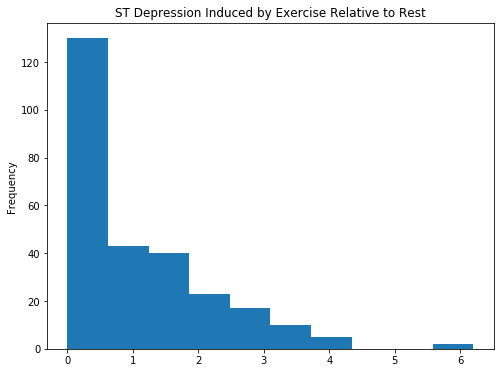

In [35]:
# Display ST depression induced by exercise relative to rest distribution
df['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

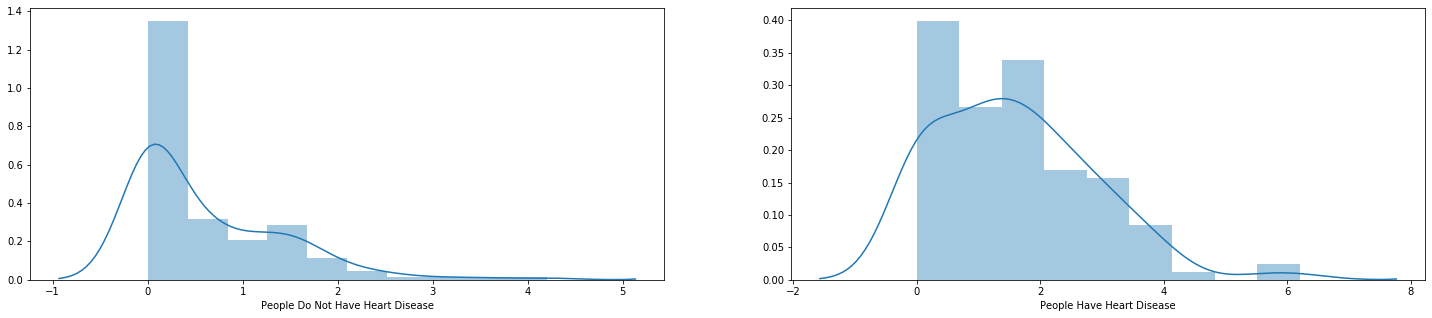

In [36]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 1]['oldpeak'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 2]['oldpeak'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

In [37]:
# Get min, max and average of the ST depression  of the people have heart diseas
print('Min ST depression of people who do not have heart disease: ', min(df[df['target'] == 1]['oldpeak']))
print('Max ST depression of people who do not have heart disease: ', max(df[df['target'] == 1]['oldpeak']))
print('Average ST depression of people who do not have heart disease: ', df[df['target'] == 1]['oldpeak'].mean())

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  4.2
Average ST depression of people who do not have heart disease:  0.6226666666666668


In [38]:
# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(df[df['target'] == 2]['oldpeak']))
print('Max ST depression of people who have heart disease: ', max(df[df['target'] == 2]['oldpeak']))
print('Average ST depression of people not have heart disease: ', df[df['target'] == 2]['oldpeak'].mean())

Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  6.2
Average ST depression of people not have heart disease:  1.584166666666667


**Note:**

The average ST depression of people who do not have heart disease is 0.6 and the average ST depression of people have heart disease is 1.5. 

### Slope Exploration

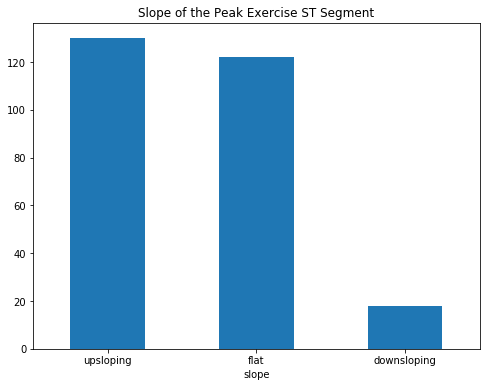

In [39]:
# Display slope of the peak exercise ST segment in bar chart
df.groupby(df['slope']).count()['target'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

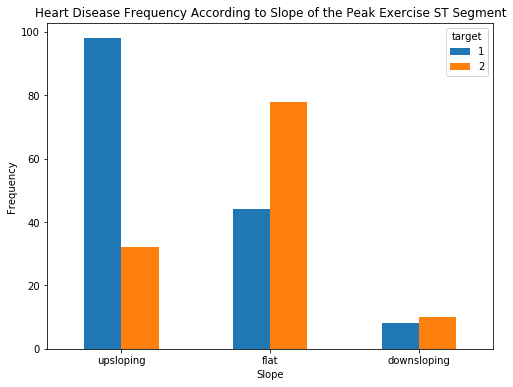

In [40]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(df.slope,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with flat peak ST segment are likely to have heart disease and usually the people who do not have heart disease have upsloping peak ST segment.

### Major Vessels Exploration

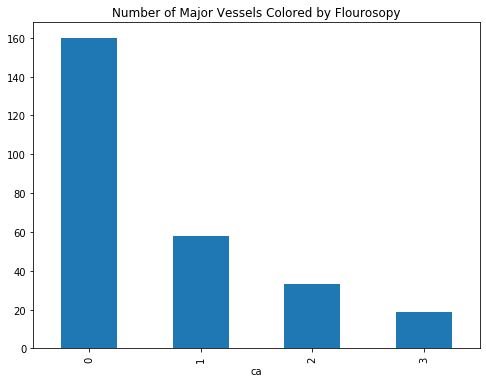

In [41]:
# Display number of major vessels in bar chart
df.groupby(df['ca']).count()['target'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', 
                                            figsize = (8, 6))
plt.show()

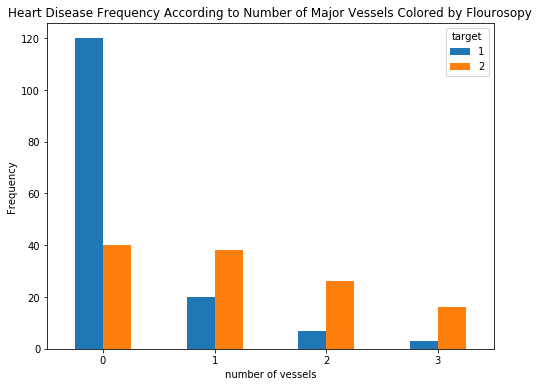

In [42]:
# Display number of vessels based on the target
pd.crosstab(df.ca,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people who do not have heart disease usually do not have major vessels colored by flourosopy.

### Thalassemia Exploration

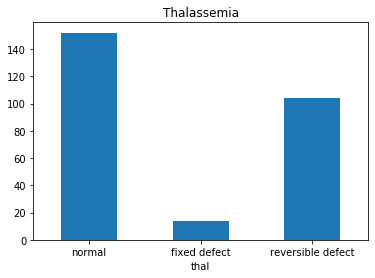

In [43]:
# Display thalassemia in bar chart
df.groupby(df['thal']).count()['target'].plot(kind = 'bar', title = 'Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.show()

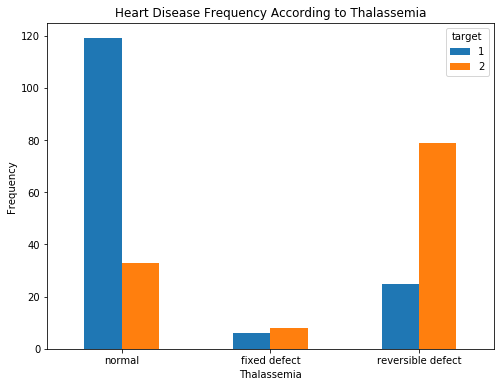

In [44]:
pd.crosstab(df.thal,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

**Note:**

As it is clear, the people with reversible defect are likely to have heart disease.

### The correlation between heart disease, cp and exang

C:\Users\nikita\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



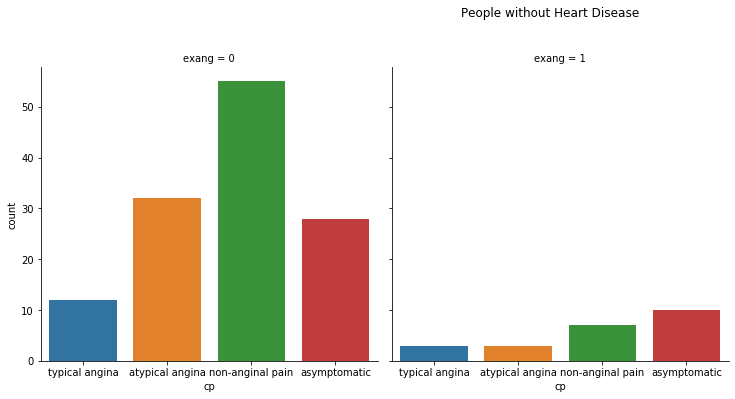

In [45]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 1], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People without Heart Disease', y = 1.1)
plt.show()

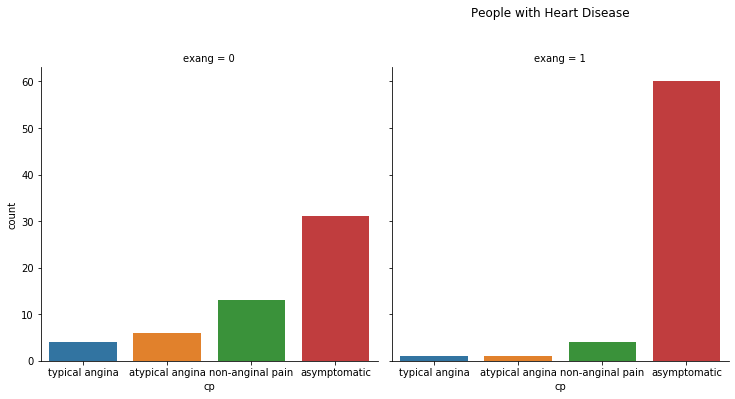

In [46]:
g = sns.factorplot("cp", col = "exang", col_wrap = 3, data = df[df['target'] == 2], kind = "count")
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
g.fig.suptitle('People with Heart Disease', y = 1.1)
plt.show()

**Note:**

The people who have exercise induced angina, they usually suffer from asymptomatic chest pain. Moreover, the people who do not have exercise induced angina, they usually suffer from asymptomatic chest pain if they have heart disease.


### The correlation between oldpeak, slope and target

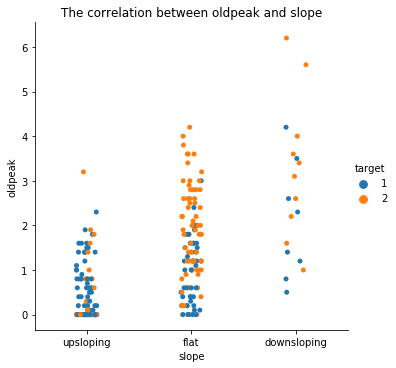

In [47]:
sns.catplot(x = "slope", y = "oldpeak", hue = "target", data = df)
plt.title('The correlation between oldpeak and slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.show()

**Note:**

Flat slope and downsloping have higher values of ST depression.

### The correlation between ca and age

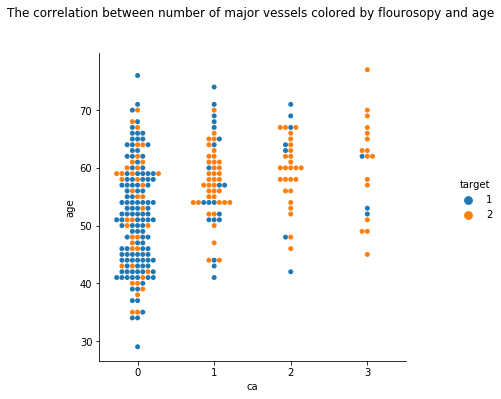

In [48]:
g = sns.catplot(x = 'ca', y = 'age', hue = 'target', data = df, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

**Note:**

The older people are more likely to have vessels colored by flourosopy.

### The correlation between age and thalach

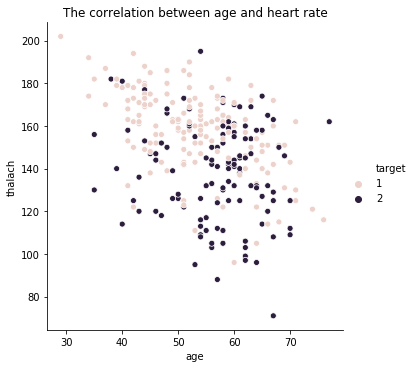

In [49]:
sns.relplot(x = 'age', y = 'thalach', data = df, hue = 'target', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

**Note:**

The older the person, the lower the heart rate. Also, the people with lower heart rate are likely to have heart disease. 

## 3. Modeling

### 3.1. Prepare Data for Machine Learning

In [50]:
# Initialize data and target
target = df['target']
features = df.drop(['target'], axis = 1)

In [51]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

### 3.2. Train and Evaluate Models

In [52]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [53]:
# Initialize the models
rf = RandomForestClassifier(random_state = 1)
gb = GradientBoostingClassifier(random_state = 1)
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 101))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
# m is the best value of n_neighbors 
m=scores.index(max(scores))+1


# Fit and evaluate models
results = {}
for cls in [rf, gb, knn]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

C:\Users\nikita\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [54]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

RandomForestClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.80      0.80      0.80        30
           2       0.75      0.75      0.75        24

    accuracy                           0.78        54
   macro avg       0.78      0.78      0.78        54
weighted avg       0.78      0.78      0.78        54


confusion_matrix :
[[24  6]
 [ 6 18]]

-----

GradientBoostingClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.79      0.73      0.76        30
           2       0.69      0.75      0.72        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54


confusion_matrix :
[[22  8]
 [ 6 18]]

-----

KNeighborsClassifier

classification_report :
              precision    recall  f1-score   support

           1       0.67      0.87      0.75        

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis=1)
y = df['target']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42) 

In [56]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(df.index)) * 100))

84.81% in training set
15.19% in test set


In [57]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['target'] == 1]), (len(df.loc[df['target'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['target'] == 0]), (len(df.loc[df['target'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 150 (55.56%)
Original False : 0 (0.00%)

Training True  : 127 (55.46%)
Training False : 0 (0.00%)

Test True      : 23 (56.10%)
Test False     : 0 (0.00%)


1st max value of 0.913 occured at C=0.100


Text(0, 0.5, 'recall score')

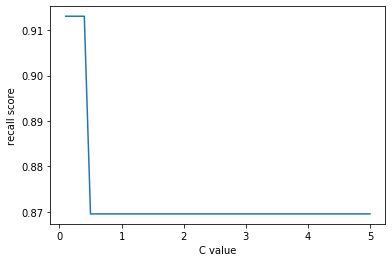

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [59]:
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.8780
[[21  2]
 [ 3 15]]

Classification Report
              precision    recall  f1-score   support

           1       0.88      0.91      0.89        23
           2       0.88      0.83      0.86        18

    accuracy                           0.88        41
   macro avg       0.88      0.87      0.88        41
weighted avg       0.88      0.88      0.88        41



In [60]:
lr_model.predict([[70,1,4,130,322,0,2,109,0,2.4,2,3,3]])

array([2], dtype=int64)

In [61]:
from sklearn.model_selection import train_test_split
X = df.drop(['target'], axis=1)
y = df['target']

X_train,X_test ,y_train, y_test = train_test_split(X,y,
                                                   test_size=0.15,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)


In [76]:
# dimensionality reduction to consider the most effective factors to the model 
from sklearn.decomposition  import PCA
pca =PCA(n_components = 5)# the same number you define as input_dim argument of first layer of ann
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance= pca.explained_variance_ratio_
print(explained_variance)

[0.75075539 0.14860854 0.08301539 0.01661033 0.00101035]


Using TensorFlow backend.


Train on 229 samples, validate on 229 samples
Epoch 1/20
229/229 [==============================] - 1s 5ms/sample - loss: -2.9936 - accuracy: 0.5546 - val_loss: -4.6723 - val_accuracy: 0.5546
Epoch 2/20
229/229 [==============================] - 0s 272us/sample - loss: -5.9578 - accuracy: 0.5546 - val_loss: -7.9551 - val_accuracy: 0.5546
Epoch 3/20
229/229 [==============================] - 0s 189us/sample - loss: -9.7913 - accuracy: 0.5546 - val_loss: -12.0727 - val_accuracy: 0.5546
Epoch 4/20
229/229 [==============================] - 0s 170us/sample - loss: -14.3121 - accuracy: 0.5546 - val_loss: -17.9358 - val_accuracy: 0.5546
Epoch 5/20
229/229 [==============================] - 0s 246us/sample - loss: -20.8555 - accuracy: 0.5546 - val_loss: -26.1725 - val_accuracy: 0.5546
Epoch 6/20
229/229 [==============================] - 0s 242us/sample - loss: -30.9282 - accuracy: 0.5546 - val_loss: -38.1902 - val_accuracy: 0.5546
Epoch 7/20
229/229 [==============================] - 0s 240u

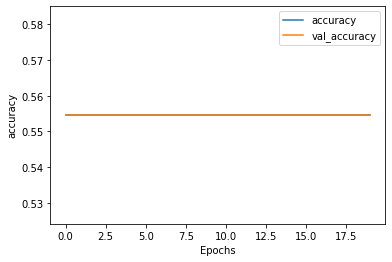

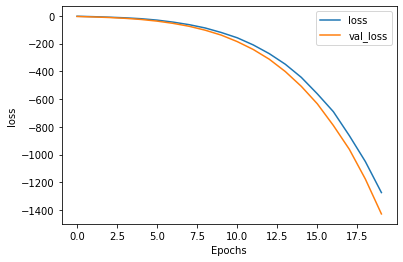

In [63]:
import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
# ANN model 

ann_model = Sequential() 

ann_model.add(Dense(32,  activation = 'relu' ,input_dim = 5))
ann_model.add(Dense(16,  activation = 'relu' ))
ann_model.add(Dense(7 , activation = 'relu' ))

ann_model.add(Dense(1  ,activation = 'sigmoid'))

ann_model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' ,metrics = ['accuracy'])

num_epochs = 20
history = ann_model.fit(X_train ,
                    y_train ,
                    epochs= num_epochs ,
                    batch_size = 20,
                    validation_data=(X_train ,y_train))

# evaluate the model
loss, acc = ann_model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: {:3.3f} and loss {:3.3f}'.format(acc ,loss))

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [64]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5) *1
n = 10
right = 0
wrong = 0
prediction = y_pred.tolist()
prediction_sample = prediction[:n]
y_true = [[i] for i in y_test]
true_sample = y_true[:n]
print(f'\n accuracy : {acc}\n')
print(f' Actual values   : {true_sample}')
print(f'predicted values : {prediction_sample}\n')

for i in range(n):

    if true_sample[i] == prediction_sample[i]:
        right = right +1
    else :
        wrong= wrong + 1
print(f'{right} of {n} True Prediction')
print(f'{wrong} of {n} False Prediction')



 accuracy : 0.5609756112098694

 Actual values   : [[2], [1], [2], [2], [1], [1], [1], [1], [1], [2]]
predicted values : [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

6 of 10 True Prediction
4 of 10 False Prediction


In [65]:
rf.predict([[53,1,4,142,226,0,2,111,1,0,1,0,7]])

array([1], dtype=int64)

In [66]:
rf.predict([[70,1,4,130,322,0,2,109,0,2.4,2,3,3]])

array([2], dtype=int64)

In [67]:
print(X_train)

[[ -48.93612424   25.56599659   11.87999906   -8.75764578   -1.46849147]
 [  32.81862684  -11.52954964  -12.29525687    5.85508445    1.290318  ]
 [ -73.644764     28.53166209  -11.67276904  -12.65222071   -1.92948379]
 ...
 [ -47.57798953    4.9211508   -18.1065068    -4.44767685    1.69092992]
 [-122.92239763  -16.04308859   29.58768485    7.16926051   -2.62212824]
 [   1.9064399   -19.79552931    6.71210273   11.54916699    1.44312602]]


In [68]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(rf, file, protocol=2)

In [78]:
print(f'Train Accuracy for RF is : {rf.score(X,y)}')

Train Accuracy for RF is : 0.9296296296296296


In [70]:
lr_model.predict([[53,1,4,142,226,0,2,111,1,0,1,0,7]])

array([2], dtype=int64)

In [71]:
lr_model.predict([[70,1,4,130,322,0,2,109,0,2.4,2,3,3]])

array([2], dtype=int64)

Feature: age, Score: 0.09246
Feature: sex, Score: 0.02640
Feature: cp, Score: 0.12085
Feature: trestbps, Score: 0.07236
Feature: chol, Score: 0.07335
Feature: fbs, Score: 0.00809
Feature: restecg, Score: 0.02159
Feature: thalach, Score: 0.11695
Feature: exang, Score: 0.05042
Feature: oldpeak, Score: 0.13234
Feature: slope, Score: 0.02268
Feature: ca, Score: 0.07859
Feature: thal, Score: 0.18393


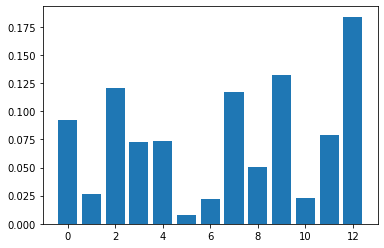

In [79]:
# get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (features.columns[i], v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()